In [274]:
import os
import json
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

def edges_heap(arr):
    n = len(arr)
    k = int(n / 2)
    edges = [x for i in range(k) for x in ((i, 2 * i + 1), (i, 2 * i + 2)) if x[1] < n]
    return edges
    
def plot_heap(arr):
    f = graphviz.Digraph(filename = "output/heap.gv")
    names = list(map(str, range(len(arr))))
    positions = list(map(str, arr))
    for name, position in zip(names, positions):
         f.node(name, position)
            
    k = int(len(arr) / 2)
    #f.edges(((str(e[0]), str(e[1])) for e in edges_heap(arr)))
    edges = [f.edge(str(e[0]), str(e[1])) for e in edges_heap(arr)]
    return f

def remove_attribute(s, key):
    idx_start = s.find(key)
    idx_end = idx_start + len(key) + 1 # key=
    i = s.find(" ", idx_end)
    if i == -1:
        i = s.find("]", idx_end)
    idx_end = i
    s = s[:idx_start] + s[idx_end:]
    if " ]" in s:
        s = s.replace(" ]", "]")
    return s

def update_node(f, idx, key = "color", value = "red"):
    s = f.body[idx]
    if key in s:
        f.body[idx] = remove_attribute(s, key)
    if "[]" in f.body[idx]:
        f.body[idx] = f.body[idx][:-1] + "[{0}={1}]\n".format(key, value)
    else:
        f.body[idx] = f.body[idx][:-2] + " color=" + value + "]\n"
    return f

def update_edge(f, i, j, key = "color", value = "red"):
    idx = -1
    for num, el in enumerate(f.body):
        #s = "3 -> 8"
        s = str(i) + " -> " + str(j)
        if(s in el):
            idx = num
            break
    if(idx == -1):
        print("Not found")
        return f
    if(key in f.body[idx]):
        f.body[idx] = remove_attribute(f.body[idx], key)
    if not("[" in  f.body[idx]): # no attributes
        f.body[idx] = f.body[idx][:-1] + " [color=" + value + "]\n"
    elif "[]" in f.body[idx]:
        f.body[idx] = f.body[idx].replace("[]", "")
        f.body[idx] = f.body[idx][:-1] + " [{0}={1}]\n".format(key, value)
    else:
        pass # add more attributes
        
    return f

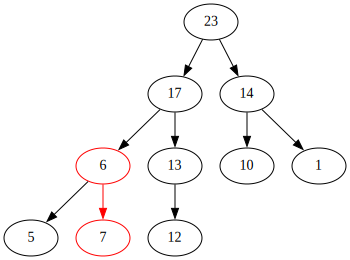

In [277]:
#print(json.dumps(f.__dict__, indent=2))
arr = [23, 17, 14, 6, 13, 10, 1, 5, 7, 12]
f = plot_heap(arr)
f = update_node(f, 3)
f = update_node(f, 8)
f = update_edge(f, 3, 8)
f

In [ ]:
import numpy as np
class Heap:
    def __init__(self, arr):
        self.arr = np.array(arr)
        
    def get_value(self, i):
        return self.arr[i]
    
    def get_children(self, i):
        retrun self.arr[2 * i], self.arr[2 * i + 1]
    

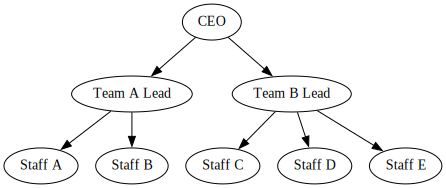

In [37]:
# Snippets
import graphviz
f = graphviz.Digraph(filename = "output/plain organogram 1.gv")
names = ["A","B","C","D","E","F","G","H"]
positions = ["CEO","Team A Lead","Team B Lead", "Staff A","Staff B", "Staff C", "Staff D", "Staff E"]
for name, position in zip(names, positions):
     f.node(name, position)
f.edge("A","B"); f.edge("A","C") #CEO to Team Leads
f.edge("B","D"); f.edge("B","E") #Team A relationship
f.edge("C","F"); f.edge("C","G"); f.edge("C","H") #Team B relationship
 
f
# https://towardsdatascience.com/graph-visualisation-basics-with-python-part-iii-directed-graphs-with-graphviz-50116fb0d670